In [62]:
#定义爬取豆瓣网信息函数
import requests
from bs4 import BeautifulSoup

def parse_html(book):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }
    response = requests.get(f'https://www.douban.com/search?q=' + book ,headers=headers)
    #response = requests.get(f'https://book.douban.com/top250?start={num}', headers=headers)
    soup = BeautifulSoup(response.text, 'lxml')
    #print(soup)

    #类型和名称
    all_Type = soup.find_all('h3')
    book_names = [Type.get_text() for Type in all_Type]
    leixing = []
    mingcheng = []
    for piece in book_names:
        if "小组" in piece:
            continue
        elif "日记" in piece:
            continue
        else:  #首先去除爬取到的多余信息
            piece  = piece.strip().replace(' ', '')
            piece = piece.strip().replace('[', '')
            piece = piece.strip().replace('可播放', '')
            piece = piece.strip().replace('可试读', '')
            piece = piece.strip().replace('有电子版', '')
            piece = piece.strip().replace('\n', '')
            piece = piece.strip().replace('\xa0', '')            
            str1 = piece.split(']')
            if book in str1[0]:
                continue
            else:
                leixing.append(str1[0])
                mingcheng.append(str1[1])
            #for i in str1:
               # print(i)
    #print(len(leixing))
    #print(mingcheng)
    
   
    #出版年份ok 
    all_year = soup.find_all('span', class_='subject-cast')
    nianfen = []
    book_years = [year.get_text() for year in all_year]
    for piece in book_years:
        str1 = piece.split(' ')
        try:
            nianfen.append(int(str1[-1]))  #在获得数据中摘取出版年份
        except:    #抛出异常，排除没有出版年份（即对应位置数据不能转换成int型数据）的情况
            nianfen.append(0)
    #print(len(nianfen))
 
   
    #评价人数ok
    all_people = soup.find_all('span',class_='')
    book_people = [people.get_text() for people in all_people]
    renshu = []
    i=0
    for piece in book_people:  
        if '[' not in piece:
            i +=1
        else:
            break
    book_people = book_people[i::]    #摘除开头多余的信息
    
    for piece in book_people:        
        if '日记' in piece:
            continue
        elif '小组' in piece:
            continue        
            #print(piece)
        elif '人评价' in piece:   #摘取含有评价人数的元素
            piece = piece.strip('(').strip(')')
            piece = piece.strip("人评价")   #去除字符串中多余指定字符
            renshu.append(int(piece))
        elif "(" in piece:  #对于“暂未上映”或者“尚无评价”的数据，将评价人数赋为0
            renshu.append(0)        
        #else:
            #renshu.append(0)
    #print(type(book_people))
    #print(len(renshu))
    #print(renshu)
    
    #评分ok
    all_mark = soup.find_all('span', class_='rating_nums')
    book_rates = [mark.get_text() for mark in all_mark]
    #print(len(book_rates))
    pingfen = []
    for i in range(len(mingcheng)):  #不能用len(book_rates)，某些无评分的数据未导入，book_rates长度比其他列表短，会造成信息错乱
        if renshu[i] ==0:
            pingfen.append(float(0))  #对于无评分的数据将评分补成0
            book_rates.insert(i,'0')  #
        else:
            pingfen.append(float(book_rates[i]))
    #print(len(pingfen))
    #print(len(mingcheng))
    #print(pingfen)    
    
    content = []
    content = [leixing, mingcheng, nianfen, renshu, pingfen]
    return content
    

In [63]:
#为方便观察爬取到的结果，将数据写入csv文件，定义写入格式
import csv
import pandas as pd
#csv 写入

def write_(book,content):
    #Type.append('type')
    #Name.append('name')
    content[0].insert(0,"类型")
    content[1].insert(0,"名称")
    content[2].insert(0,"出版年份")
    content[3].insert(0,"评价人数")
    content[4].insert(0,"评分")
    file1= open(book + '.csv','a+', newline='')
    #a+:打开一个文件用于读写。如果该文件已存在，文件指针将会放在文件的结尾。文件打开时会是追加模式。如果该文件不存在，创建新文件用于读写。
    #设定写入模式
    csv_write = csv.writer(file1,dialect='excel')
    #写入具体内容
    #dataframe1 = pd.DataFrame({'Type':Type,'Name':Name})
   
    for val in zip(content[0],content[1],content[2],content[3],content[4]):
        csv_write.writerow(val)
    #csv_write.writerow(Type)
    #csv_write.writerow(Name)
    file1.close()
    print ("write over")

In [64]:
#从豆瓣网上爬取四大名著相关产品的数据
if __name__ == '__main__':
    print('begin')
    data1 = parse_html("红楼梦")
    data2 = parse_html("水浒传")
    data3 = parse_html("三国演义")
    data4 = parse_html("西游记")
    print(data1)
    print(data2)
    print(data3)
    print(data4)
    print('end')

begin
[['电视剧', '电视剧', '书籍', '书籍', '电影', '电影', '电影', '电影', '书籍', '书籍', '电视剧', '电视剧', '电视剧', '电影', '电影', '电影', '电影', '电视剧', '电视剧', '电影'], ['红楼梦', '红楼梦', '红楼梦', '红楼梦', '红楼梦', '红楼梦', '红楼梦', '红楼梦', '红楼梦', '红楼梦', '红楼梦', '红楼梦', '红楼梦', '红楼梦', '红楼梦', '金玉良缘红楼梦', '红楼梦', '百家讲坛：刘心武揭秘《红楼梦》', '新红楼梦', '红楼梦'], [1987, 2010, 1996, 2016, 2018, 1989, 2019, 1962, 1999, 2017, 1977, 1996, 2002, 2015, 1944, 1977, 1962, 2005, 2005, 1927], [90224, 36783, 194182, 1515, 2428, 2693, 0, 2602, 10435, 376, 0, 126, 185, 166, 296, 5229, 234, 670, 116, 0], [9.6, 6.0, 9.6, 9.7, 4.3, 7.9, 0.0, 9.0, 9.6, 9.3, 0.0, 5.9, 8.5, 6.9, 6.3, 7.4, 5.9, 8.0, 4.6, 0.0]]
[['电视剧', '电视剧', '书籍', '电影', '书籍', '电影', '电视剧', '电视剧', '游戏', '电视剧', '电视剧', '电视剧', '电影', '电视剧', '电影'], ['水浒传', '水浒传', '水浒传', '水浒传', '水浒传（全二册）', '水浒传之英雄本色', '水浒传', '小戏骨：水浒传', '幻想水浒传2SuikodenII', '极道水浒传', '六合水浒传', '台湾水浒传', '水浒传：智取生辰纲', '水浒', '水浒之智取生辰纲'], [1998, 2011, 2009, 1972, 1997, 1993, 1977, 2018, 0, 1992, 2006, 1994, 1957, 1982, 2017], [35195, 18419, 1582, 1366, 3794

In [65]:
#将数据写入.csv文件
write_("红楼梦",data1)
write_("水浒传",data2)
write_("三国演义",data3)
write_("西游记",data4)

write over
write over
write over
write over


In [66]:
#定义函数，读取csv文件并将信息按列分离
import os
import pandas as pd
import csv

def open_data(book):
    mxdPath=r"C:\Users\73916\\" + book + r".csv"
    file=open(mxdPath)
    content = csv.reader(file)   ##reader(f)读取文件中的一行，read()只能读取一个字符
    data = []
    Type = []
    Name = []
    Year = []
    People = []
    Mark = []
    for piece in content:
        data.append(piece)
    #print(data)
    for piece in data[1::]:#第一行为各列名称，所以从第二行开始截取，即data[1]
        Type.append(piece[0])
        Name.append(piece[1])
        Year.append(piece[2])
        People.append(piece[3])
        Mark.append(piece[4])
    #print(content)
    file.close()
    content = [Type, Name, Year, People, Mark]
    return content

In [67]:
#打开四个表格
content1 = open_data('红楼梦')
print(content1[0])
content2 = open_data('西游记')
print(content2[0])
content3 = open_data('水浒传')
print(content3[0])
content4 = open_data('三国演义')
print(content4[0])

['电视剧', '电视剧', '书籍', '书籍', '电影', '电影', '电影', '电影', '书籍', '书籍', '电视剧', '电视剧', '电视剧', '电影', '电影', '电影', '电影', '电视剧', '电视剧', '电影']
['电视剧', '电影', '电视剧', '电视剧', '电视剧', '电视剧', '电视剧', '电影', '电影', '电视剧', '电影', '电影', '电视剧', '电影', '电视剧', '电影', '电影', '电影', '电影', '电视剧']
['电视剧', '电视剧', '书籍', '电影', '书籍', '电影', '电视剧', '电视剧', '游戏', '电视剧', '电视剧', '电视剧', '电影', '电视剧', '电影']
['电视剧', '电视剧', '电视剧', '书籍', '书籍', '书籍', '电视剧', '电影', '电影', '电视剧', '电视剧', '电视剧', '电影', '音乐', '音乐', '音乐']


In [68]:
#定义函数，对于爬到的产品类型进行分析
def ana_type(book,Type):
    type_dict = {}
    
    for data in Type:   #统计各个类型的产品数量，不同类型作为字典的key
        if data not in type_dict.keys():   #如果该key不存在，则将value值初始化为1
            type_dict[data] = 1   
        else:     #如果该key存在，则将value值加1
            type_dict[data] +=1   

    #print (type_dict)
    num = []
    typename = []
    explode = []
    print(type_dict)
    for key,value in type_dict.items():
        typename.append(key)
        num.append(value)
    for name in typename:
        explode.append(0)
    explode = tuple(explode)
    #for key in type_dict
    drawpie(book,typename, num,explode)
    return num

In [69]:
#定义函数，绘制饼状图
import matplotlib.pyplot as plt
from pylab import mpl#字体
#设置字体
   
def drawpie(book,name,num,explode):#画饼状图
    mpl.rcParams['font.sans-serif'] = ['SimHei'] 
    plt.title("豆瓣网《" + book + "》相关产品种类分布情况")
    sizes=num
    colors='lightgreen','gold','lightskyblue','lightcoral'
    #explode=0,0,0
    #print(type(explode))
    plt.pie(sizes,explode=explode,labels=name,
            colors=colors,autopct='%1.1f%%',shadow=True,startangle=50)
    plt.axis('equal')
    plt.show()
    

{'电视剧': 7, '书籍': 4, '电影': 9}


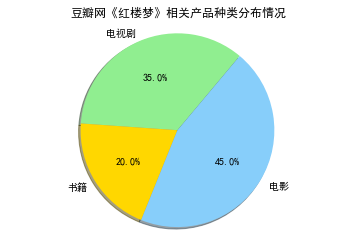

{'电视剧': 10, '电影': 10}


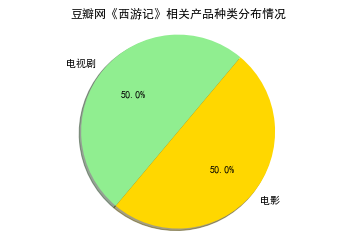

{'电视剧': 8, '书籍': 2, '电影': 4, '游戏': 1}


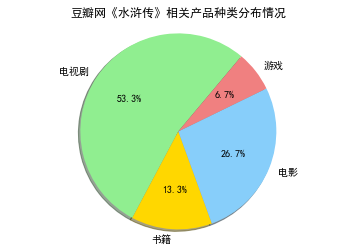

{'电视剧': 7, '书籍': 3, '电影': 3, '音乐': 3}


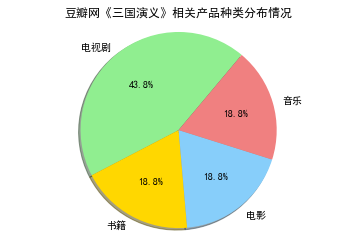

In [70]:
#分析四大名著相关产品的类型分布，并绘制对应的饼状图,类型为表格中的第一列(content[0])
num1 = ana_type("红楼梦",content1[0])
num2 = ana_type("西游记",content2[0])
num3 = ana_type("水浒传",content3[0])
num4 = ana_type("三国演义",content4[0])

In [71]:
#定义函数，对于爬到的产品出版年份进行分析
def ana_year(book,Year):
    num = [0,0,0,0,0]
    for data in Year:
        data = int(data)
        if data < 1979:
            num[0] += 1   
        elif data < 1990:
            num[1] += 1
        elif data < 2000:
            num[2] += 1
        elif data < 2010:
            num[3] +=1
        else:
            num[4] += 1
    #print (type_dict)
    print(num)
    drawyear(book,num)

In [72]:
#定义函数，绘制出版年份柱状图
import matplotlib.pyplot as plt 
from pylab import mpl#字体
#解决中文显示问题
from matplotlib import mlab
from matplotlib import rcParams

       
def drawyear(book, count):#画折线图   
    mpl.rcParams['font.sans-serif'] = ['SimHei']         
    plt.title("《" + book + "》相关产品出版年份统计")
    name_list = ['1979年以前', '1979-1990', '1990-2000', '2000-2010', '2010年之后']
    plt.xlabel("时间")
    plt.ylabel("新出版产品数量")
    
    #y1= [2,4,7,2,4]
 
    plt.plot(name_list, count)
    #plt.plot(x, y2)

    #plt.xticks((0,1,2,3,4),('1979年以前', '1979-1990', '1990-2000' , '2000-2010', '2010年之后'))

    #plt.bar(x = (0,1,2,3),height = distance,width = 0.35,align="center")

    #rect = plt.bar(x = (0,1,2,3,4),height = count,width = 0.35,align="center")
    
    #autolabel(rect)

    plt.show()
    #print(count)
    return count


[6, 2, 3, 3, 6]


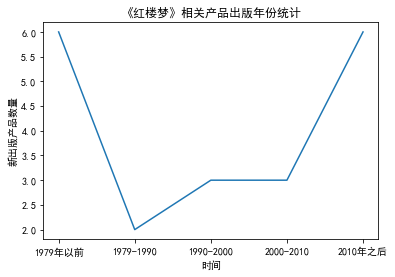

[4, 1, 5, 3, 7]


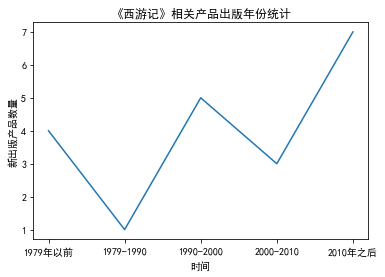

[4, 1, 5, 2, 3]


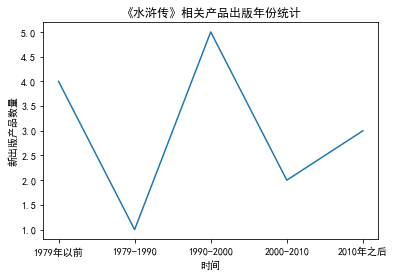

[3, 1, 3, 2, 7]


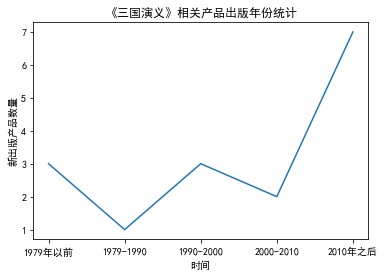

In [73]:
#分析出版年份，对应表格中的第三列(content[2])
ana_year("红楼梦",content1[2])
ana_year("西游记",content2[2])
ana_year("水浒传",content3[2])
ana_year("三国演义",content4[2])

In [74]:
#定义函数，分析四大名著的评价人数和得分情况
def ana_mark(people, mark):
    sum_ = [0,0,0,0]
    mark_ = [0,0,0,0]
    for i in range(4):
        for data in people[i]:
            if data == 0:
                contimue
            else:
                sum_[i] += int(data)
        for data in mark[i]:
            if data == 0:
                contimue
            else:
                mark_[i] += float(data)
        sum_[i] = sum_[i] / len(people[i])
        mark_[i] = mark_[i] / len(mark[i])
    print(sum_)
    drawmark(mark_)
    draw_mark(sum_,mark_)

In [75]:
#定义函数，画四大名著得分比较的柱状图
def autolabel(rects):#在柱状图上显示数量坐标
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+0.14, 1.03*height, '%s' % height)
        
def drawmark(mark):
    mpl.rcParams['font.sans-serif'] = ['SimHei']
    
    plt.title("四大名著相关出版物平均得分统计")
    name_list = ['红楼梦', '西游记', '水浒传', '三国演义']
    plt.xlabel("书名")
    plt.ylabel("得分")

    plt.xticks((0,1,2,3),('红楼梦', '西游记', '水浒传', '三国演义'))
    #print(type(mark[0]))

    #plt.bar(x = (0,1,2,3),height = distance,width = 0.35,align="center")
    #my_y_ticks = np.arange(0, 7, 0.05)
    #plt.yticks(my_y_ticks)
    for i in range(4):
        mark[i] = round(mark[i],2)  #将评分保留至小数点后两位
        #print(data)
    print(mark)
    rect = plt.bar(x = (0,1,2,3),height = mark,width = 0.35,align="center",color = 'orange')
    #rect = plt.bar(x = (0,1,2,3,4),height = count,width = 0.35,align="center")
    height = mark
    #print(type(height[0]))
    autolabel(rect)  #显示柱状图的数值

    plt.show()
    #print(count)
    #return count

In [76]:
#定义函数，绘制并列柱状图，分析评价人数和得分
import matplotlib.pyplot as plt
import numpy as np
def autolabel2(rects2):#在柱状图上显示数量坐标
    for rect in rects2:
        height = round(rect.get_height(),2)
        print(height)
        plt.text(rect.get_x()+0.05, 1.03*height, '%s' % round(height/5000,2))   #设置显示坐标位置和数值
                 
def draw_mark(sum_, mark_):
    name_list = ['红楼梦', '西游记', '水浒传', '三国演义']
    y_list = sum_
    for i in range(4):
        mark_[i] = round(mark_[i],2)  #将评分保留至小数点后两位
        #print(mark_[i])
        mark_[i] = 5000 * mark_[i]
        #print(mark_[i])
    #print(sum_)
        
    #print(mark_)
    y_list2 = mark_
    #bar_width = 0.3
    #size = 4
    #x = np.random.random(len(x_data))
    x =list(range(len(y_list)))
    total_width, n = 0.8, 2  
    width = total_width / n  
    #绘制柱状图
     
    # 在柱状图上显示具体数值, ha参数控制水平对齐方式, va控制垂直对齐方式
    #for x, y in enumerate(y_data):
        #plt.text(x, y + 100, '%s' % y, ha='center', va='bottom')
    #for x, y in enumerate(y_data2):
        #plt.text(x+bar_width, y + 100, '%s' % y, ha='center', va='top')
    rect = plt.bar(x, y_list, width=width, label='平均评论人数',fc = 'y')  
    for i in range(len(x)):  
        x[i] = x[i] + width  
    rect2 = plt.bar(x, y_list2, width=width, label='平均得分',tick_label = name_list,fc = 'r')  
    plt.legend()  
    #plt.show()  
    #设置标题
    plt.title("豆瓣网四大名著相关评论数和得分情况")
    plt.xlabel("书籍")
    plt.ylabel("数量")
    autolabel2(rect2)
    #plt.legend()
    plt.show()

[17413.0, 113509.4, 7934.133333333333, 12594.625]
[6.42, 6.48, 5.23, 6.99]


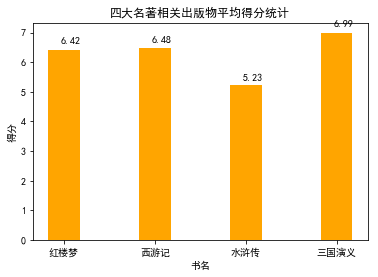

32100.0
32400.0
26150.0
34950.0


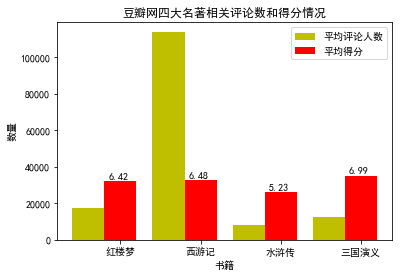

In [77]:
#分析四大名著相关出版物平均得分和评价人数
people = [content1[3],content2[3],content3[3],content4[3]]
mark = [content1[4],content2[4],content3[4],content4[4]]
ana_mark(people,mark)

In [78]:
def ana_typemark(book, type_, num, mark_):   #type_为各类书籍的类型，mark_为得分列表,num为不同类型的产品数量
    type_dict = {}
    for i in range(1,len(type_)):#遍历列表中的各个元素
        if type_[i] not in type_dict.keys():   #如果该key不存在，则将value值初始化为该组数据得分
            type_dict[type_[i]] = float(mark_[i]) 
        else:     #如果该key存在，则将value值加1
            type_dict[type_[i]] += float(mark_[i])    

    sum_ = []
    typename = []  #类型名称列表
    average = []   #各个类型对应的平均分
    explode = []
    for key,value in type_dict.items():
        typename.append(key)
        sum_.append(value)
        explode.append(0)
    i = 0
    for key,value in type_dict.items():
        average.append(value/num[i])
        i += 1
    explode = tuple(explode)
    drawtype(book,typename, average,explode)

In [79]:
#定义函数，画四大名著不同类型得分比较的柱状图
def drawtype(book,typename, average,explode):
    mpl.rcParams['font.sans-serif'] = ['SimHei']
    
    plt.title("《" + book + "》不同类型出版物平均得分统计")
    name_list = typename
    plt.xlabel("类型")
    plt.ylabel("平均得分")
    list1 = []
    for i in range(len(typename)):
        list1.append(i)
    list1 = tuple(list1)
    typename = tuple(typename)
    #plt.xticks((0,1,2,3),('红楼梦', '西游记', '水浒传', '三国演义'))
    plt.xticks(list1,typename)  #参数要求为元组，强制类型转换
    #print(type(mark[0]))

    #plt.bar(x = (0,1,2,3),height = distance,width = 0.35,align="center")
    #my_y_ticks = np.arange(0, 7, 0.05)
    #plt.yticks(my_y_ticks)
    for i in range(len(typename)):
        average[i] = round(average[i],2)  #将评分保留至小数点后两位
        #print(data)
    print(average)
    rect = plt.bar(x = list1,height = average,width = 0.35,align="center",color = 'lightblue')
    #rect = plt.bar(x = (0,1,2,3,4),height = count,width = 0.35,align="center")
    height = average
    #print(type(height[0]))
    autolabel(rect)  #显示柱状图的数值

    plt.show()
    #print(count)
    #return count

[4.71, 9.55, 5.3]


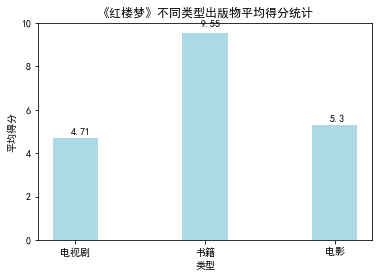

[5.48, 6.53]


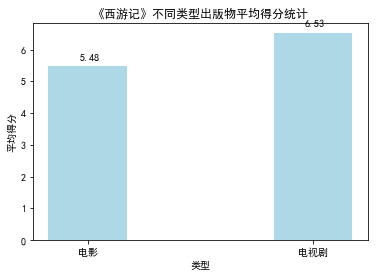

[3.61, 8.85, 3.5, 9.3]


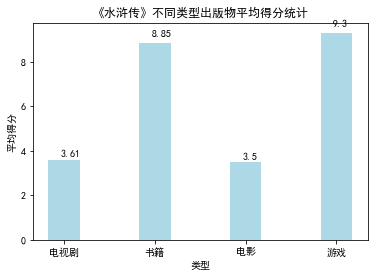

[6.17, 9.3, 4.4, 6.07]


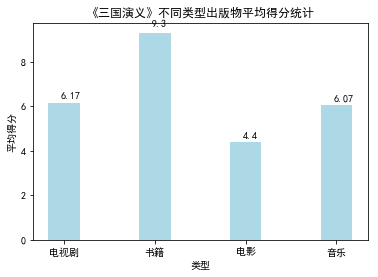

In [81]:
ana_typemark("红楼梦", content1[0], num1, content1[4])
ana_typemark("西游记", content2[0], num2, content2[4])
ana_typemark("水浒传", content3[0], num3, content3[4])
ana_typemark("三国演义", content4[0], num4, content4[4])

In [82]:
import requests
from bs4 import BeautifulSoup

def travelnum(place):
    Num = 0
    for i in range(10):  #四类景区的搜索结果页数均不超过10
        url = "https://vacations.ctrip.com/whole-1B126P" + str(i+1) + "/?searchvalue=" + place    #翻页，循环爬取        
        # 将cookies字符串组装为字典
        cookies_str = '复制粘贴对应网站cookies'
        cookies_dict = {}       
        # 其他请求头参数
        headers = {            
             'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
        }       
        # 访问页面
        page = requests.get(url=url, cookies=cookies_dict, headers=headers)
        soup = BeautifulSoup(page.text, 'lxml')
        all_divs = soup.find_all('div', class_='product_main')
        travel_divs = [div.get_text() for div in all_divs]
        num = len(travel_divs)
        #print(num)
        Num += num
        if num < 30:
            break
    return Num
       
num1 = travelnum('西游记')
print("西游记相关景点数量：")
print(num1)
num2 = travelnum('红楼梦')
print("红楼梦相关景点数量：")
print(num2)
num3= travelnum('水浒传')
print("水浒传相关景点数量：")
print(num3)
num4 = travelnum('三国演义')
print("三国演义相关景点数量：")
print(num4)
content = [num1,num2,num3,num4]

西游记相关景点数量：
126
红楼梦相关景点数量：
2
水浒传相关景点数量：
0
三国演义相关景点数量：
5


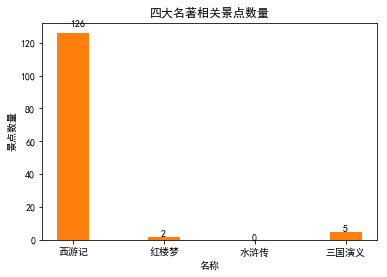

[126, 2, 0, 5]

In [49]:
import matplotlib.pyplot as plt 
from pylab import mpl#字体
#设置字体
from matplotlib import mlab
from matplotlib import rcParams

def draw(count):#画柱状图   
    mpl.rcParams['font.sans-serif'] = ['SimHei']         
    plt.title("四大名著相关景点数量")
    name_list = ['西游记', '红楼梦', '水浒传', '三国演义']
    #number=[dis1,dis2,dis3,dis4]
    plt.xlabel("名称")
    plt.ylabel("景点数量")

    plt.xticks((0,1,2,3),('西游记', '红楼梦', '水浒传', '三国演义'))

    #plt.bar(x = (0,1,2,3),height = distance,width = 0.35,align="center")

    rect = plt.bar(x = (0,1,2,3),height = count,width = 0.35,align="center")
    rect = plt.bar(x = (0,1,2,3),height = count,width = 0.35,align="center")
    autolabel(rect)

    plt.show()
    #print(count)
    return count
draw(content)

In [83]:
#分别统计四本书中出现次数最多的二十个词组
import os
def maxword(book, path):
    exclude_str = "，。！？、（）【】<>《》=：+-*—“”‘’… ；\n了你我她他的\u3000不一来人这儿是下此着个子下上曰之有"   #除去标点符号和无用字符
    f = open(path,encoding = 'gb18030')
    content = []
   
    for line in f:   #将每个词组存储到列表中
        #line = list(line)
        for i in range(len(line)-1):    #除去标点符号和无用字符
            if line[i] not in exclude_str:
                if line[i+1] not in exclude_str:
                    content.append(line[i]+line[i+1])
            
    count={}  #统计每个字出现的数量
    for character in content:
        count.setdefault(character,0)    #如果键不存在于字典中，将会添加键并将值设为默认值
        count[character] = count[character] + 1
     # 排序
    # x[1]是按字频排序，x[0]则是按字排序
    lstWords = sorted(count.items(), key=lambda x:x[1],  reverse=True) 
    print(book + "中出现频率最高的二十个词组为：")
    print ('字符\t字频')
    for e in lstWords[:20]:
        #print(e)
        print ('%s\t%d' % e)
    #print(count)
    f.close()
    
maxword("《红楼梦》", "D:\python\大作业\红楼梦.txt")
maxword("《西游记》", r"D:\python\大作业\西游记.txt")
maxword("《水浒传》", r"D:\python\大作业\水浒传.txt")
maxword("《三国演义》", r"D:\python\大作业\三国演义.txt")

《红楼梦》中出现频率最高的二十个词组为：
字符	字频
宝玉	3852
笑道	2316
太太	1861
什么	1811
凤姐	1719
贾母	1624
黛玉	1312
那里	1156
姑娘	1102
怎么	1074
宝钗	1038
王夫	1010
丫头	995
说道	937
知道	936
老太	934
贾政	919
如今	918
奶奶	873
自己	794
《西游记》中出现频率最高的二十个词组为：
字符	字频
行者	4188
八戒	1746
者道	1637
师父	1553
三藏	1287
大圣	1047
唐僧	972
沙僧	780
和尚	744
笑道	717
那里	710
怎么	709
菩萨	625
长老	625
妖精	604
老孙	561
戒道	559
什么	478
国王	455
见那	438
《水浒传》中出现频率最高的二十个词组为：
字符	字频
宋江	3658
李逵	1093
武松	1030
只见	903
如何	890
那里	840
哥哥	754
林冲	754
军马	735
头领	689
说道	685
吴用	681
太尉	643
听得	635
智深	623
兄弟	615
戴宗	596
梁山	558
俊义	550
卢俊	548
《三国演义》中出现频率最高的二十个词组为：
字符	字频
玄德	1813
孔明	1689
将军	942
曹操	941
却说	649
司马	575
丞相	547
关公	519
引兵	486
云长	443
荆州	420
蜀兵	391
夏侯	387
大喜	379
张飞	365
吕布	365
诸葛	347
商议	344
如何	337
大怒	337
